<a href="https://colab.research.google.com/github/barkhahbpp/deepsedataset/blob/main/bert_disaster_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing Dependencies #

Install paket dependensi / library yang digunakan untuk NLP Tweet Disaster

In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 52.9 MB/s eta 0:00:00


# 2. Dataset #

Link Dataset :

https://github.com/barkhahbpp/tweetdisasterbert.git

Sumber Dataset :

https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

https://www.kaggle.com/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data

**Data Descripstion**

|Field name|Description|
|--- |--- |
|id	|A unique identifier for each tweet |
|keyword	|A particular keyword from the tweet |
|location	|The location the tweet was sent from (may be blank) |
|text| The text of the tweet|
|target| Denotes whether a tweet is about a real disaster (1) or not (0)|

## 2.1. Data Loading ##

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataseturl = "https://raw.githubusercontent.com/barkhahbpp/tweetdisasterbert/main/dataset/tweets.csv"
twdisaster_df = pd.read_csv(dataseturl)
twdisaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


## 2.2. Explanatory Data Analysis ##

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
twdisaster_df.head(5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [6]:
twdisaster_df.groupby('target').describe()

id                                                           \
         count         mean          std  min      25%     50%      75%   
target                                                                    
0       9256.0  5631.622191  3247.050923  4.0  2853.75  5635.5  8404.50   
1       2114.0  5916.021760  3423.980548  0.0  2714.50  5930.0  9131.75   

                 
            max  
target           
0       11368.0  
1       11369.0

In [7]:
twdisaster = len(twdisaster_df.loc[twdisaster_df['target']==1])
twnotdisaster = len(twdisaster_df.loc[twdisaster_df['target']==0])


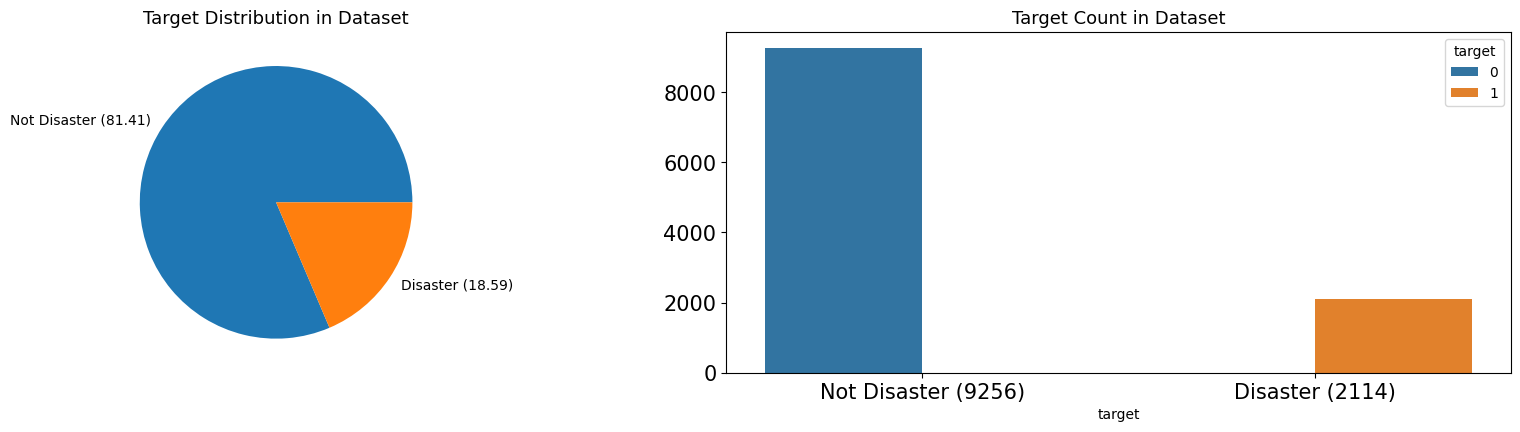

In [8]:
prop_disaster = twdisaster / len(twdisaster_df) * 100
prop_notdisaster = twnotdisaster / len(twdisaster_df) * 100

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

twdisaster_df.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster ('+'{:.2f}'.format(prop_notdisaster)+')', 'Disaster ('+'{:.2f}'.format(prop_disaster)+')'])
sns.countplot(x=twdisaster_df['target'], hue=twdisaster_df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster ('+str(twnotdisaster)+')', 'Disaster ('+str(twdisaster)+')'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()


## 2.3. Addressing Problem Imbalanced Data ##

According to the dataset analytics, we conlude that the data are imbalanced. Non-disaster data are larger than disaster data. We use the downsampling to balance data between disaster and non-disaster. Downsampling is a technique to handle imbalanced data that reduce the number of samples having the bias.

In [9]:
disaster_df = twdisaster_df[twdisaster_df['target']==1]
disaster_df.shape

(2114, 5)

In [10]:
nondisaster_df = twdisaster_df[twdisaster_df['target']==0]
nondisaster_df.shape

(9256, 5)

In [11]:
downsampled_nondisaster_df = nondisaster_df.sample(disaster_df.shape[0])
downsampled_nondisaster_df.shape

(2114, 5)

In [12]:
balanced_df = pd.concat([disaster_df, downsampled_nondisaster_df])
balanced_df.shape

(4228, 5)

In [13]:
balanced_df['target'].value_counts()

1    2114
0    2114
Name: target, dtype: int64

In [14]:
balanced_df.sample(20)

,id,keyword,location,text,target
4989,4989,epicentre,Cadigal-Wangal land/Sydney NSW,10 years ago today at 4:53pm a 7.0 earthquake ...,1
11226,11226,wounds,h: tricotiana i : lateralspew,"His wounds healed, the skin a bit thicker than...",1
867,867,blaze,NaN,Enough of Dhawan. Let's the young guns blaze,0
5097,5097,evacuation,"Los Banos, Calabarzon",Rest assured that all in-kind and cash donatio...,0
7910,7910,oil%20spill,"Pittsburgh, Pa.",Gov. Wolf vows to veto bill loosening rules fo...,0
4204,4204,displaced,Somewhere in the Good old USA!,Mohamad's 75yo father lost his mind when airst...,1
8249,8249,quarantine,Malaysia,It's also not enough to just cover your mouth ...,0
9327,9327,smoke,NaN,Awful scenes in Melbourne. Dalila Jakupovic ha...,1
11245,11245,wreck,NaN,Tail gunner on a Budweiser Truck. Bob was sitt...,1
10585,10585,twister,NaN,NYAHHAHHAHAHA tongue twister,0


# 3. Data Preprocessing#

## 3.1. Splitting Train and Test Data

Model will split dataset into training and test. We stratify data sample in which each class have an equal number of samples.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_df['text'], balanced_df['target'], stratify=balanced_df['target'])

In [16]:
y_train.value_counts()

1    1586
0    1585
Name: target, dtype: int64

In [17]:
y_test.value_counts()

0    529
1    528
Name: target, dtype: int64

# 4. Developing BERT Model

In this part, we employ BERT Preprocessing model and Bert Encoder from Tensorflow_hub.

In [18]:
import tensorflow_hub as hub
import tensorflow_text as text

## 4.1. Sentence Embedding

In [19]:
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4'

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [20]:
def get_sentence_embeding(sentences):
  preproc_text = bert_preprocess(sentences)
  return bert_encoder(preproc_text)['pooled_output']

In [21]:
# get_sentence_embeding(
#     ["Are you speaking about the atrocities and annihilation of Christians across the Middle East committed by Muslims daily?",
#      "Piscataway land // DC,this is an unfathomable number. I lived through a large earthquake and we slept under the table for one terrible night…"
#     ])

get_sentence_embeding(
    ["Are you speaking about the atrocities and annihilation of Christians across the Middle East committed by Muslims daily?",
     "Piscataway land // DC,this is an unfathomable number. I lived through a large earthquake and we slept under the table for one terrible night…"
    ])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.67592037,  0.3433142 ,  0.99986166, ...,  0.999957  ,
        -0.6299343 ,  0.9867582 ],
       [-0.6282659 ,  0.45702145,  0.99976945, ...,  0.9999256 ,
        -0.68102914,  0.9904434 ]], dtype=float32)>

## 4.2. Deep Learning Model

In [22]:
import tensorflow as tf

# BERT Model
text_input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input_layer)
bert_output = bert_encoder(preprocessed_text)

#Neural Network Layers
layer = tf.keras.layers.Dropout(0.1, name="dropout")(bert_output['pooled_output'])
layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

#Final Model
model = tf.keras.Model(inputs=[text_input_layer], outputs=[layer])


In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [24]:
len(X_train)

3171

In [25]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

# 5. Train The Model

## 5.1. Fit Model ##

In [26]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
100/100 [==============================] - 32s 152ms/step - loss: 0.7118 - accuracy: 0.5112 - precision: 0.5110 - recall: 0.5284
Epoch 2/20
100/100 [==============================] - 15s 153ms/step - loss: 0.7107 - accuracy: 0.5131 - precision: 0.5137 - recall: 0.4975
Epoch 3/20
100/100 [==============================] - 16s 158ms/step - loss: 0.7067 - accuracy: 0.5181 - precision: 0.5175 - recall: 0.5410
Epoch 4/20
100/100 [==============================] - 16s 161ms/step - loss: 0.6982 - accuracy: 0.5371 - precision: 0.5361 - recall: 0.5523
Epoch 5/20
100/100 [==============================] - 16s 159ms/step - loss: 0.6986 - accuracy: 0.5289 - precision: 0.5296 - recall: 0.5189
Epoch 6/20
100/100 [==============================] - 15s 154ms/step - loss: 0.6954 - accuracy: 0.5522 - precision: 0.5523 - recall: 0.5523
Epoch 7/20
100/100 [==============================] - 16s 156ms/step - loss: 0.6972 - accuracy: 0.5443 - precision: 0.5435 - recall: 0.5555
Epoch 8/20
100/100 [

In [27]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 6s 146ms/step - loss: 0.6664 - accuracy: 0.6008 - precision: 0.5996 - recall: 0.6042


[0.6663739085197449,
 0.6007568836212158,
 0.5996240377426147,
 0.6041666865348816]

## 5.2. Predict Model

In [28]:
y_predict = model.predict(X_test)

34/34 [==============================] - 6s 148ms/step


In [29]:
y_predict = y_predict.flatten()
y_predict

array([0.5791057 , 0.5380365 , 0.4413045 , ..., 0.48811826, 0.4948141 ,
       0.504465  ], dtype=float32)

In [30]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict

array([1, 1, 0, ..., 0, 0, 1])

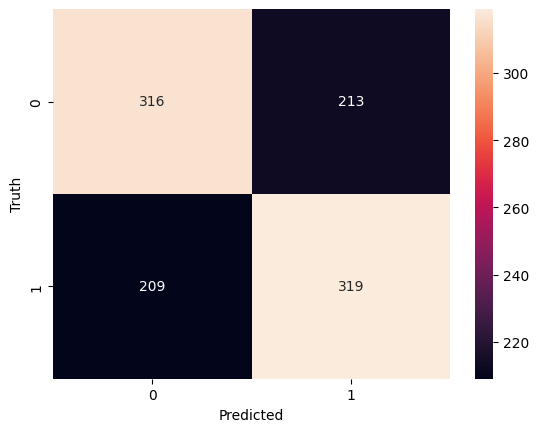

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

cmtrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cmtrix, annot=True, fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.show()

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       529
           1       0.60      0.60      0.60       528

    accuracy                           0.60      1057
   macro avg       0.60      0.60      0.60      1057
weighted avg       0.60      0.60      0.60      1057

